In [ ]:
# Install kaggle library if not already installed
!pip install -q kaggle

# Make a directory for Kaggle JSON
!mkdir -p ~/.kaggle


# Move the kaggle.json file to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set proper permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Move the kaggle.json file from /content/ to the .kaggle directory
!mv /content/kaggle.json ~/.kaggle/

# Set proper permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download the dataset from Kaggle (replace with your dataset link)
!kaggle datasets download -d ambarish/breakhis



Dataset URL: https://www.kaggle.com/datasets/ambarish/breakhis
License(s): unknown
100% 3.98G/3.99G [00:51<00:00, 76.0MB/s]
100% 3.99G/3.99G [00:51<00:00, 83.3MB/s]


In [ ]:
# Unzip the dataset
!unzip breakhis.zip -d breakhis_data


Streaming output truncated to the last 5000 lines.
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-027.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-028.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-029.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-030.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-031.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-032.p

In [ ]:
import os
import shutil

# Define the paths
source_dir = "/content/breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"
base_dest_dir = "/content/breakhis_classification_data"

# Create destination directories if not exist
if not os.path.exists(base_dest_dir):
    os.makedirs(base_dest_dir)

# Traverse through the source dataset and categorize images into subfolders
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".png"):  # Only process image files
            # Check if 'benign' or 'malignant' is in the folder name (this indicates the main class)
            if "benign" in root.lower():
                main_class = "benign"
            elif "malignant" in root.lower():
                main_class = "malignant"
            else:
                continue

            # Extract the subclass name from the folder structure
            # Typically, it should be in a part of the directory path, e.g., adenosis, fibroadenoma, etc.
            subclass = os.path.basename(root).lower()

            # Create a folder path for both main class and subclass
            dest_folder = os.path.join(base_dest_dir, main_class, subclass)

            # Create the subclass folder if it does not exist
            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)

            # Move the images into the respective folders
            source_file = os.path.join(root, file)
            shutil.copy(source_file, dest_folder)

print("Images have been successfully organized into subclass folders.")


Images have been successfully organized into subclass folders.


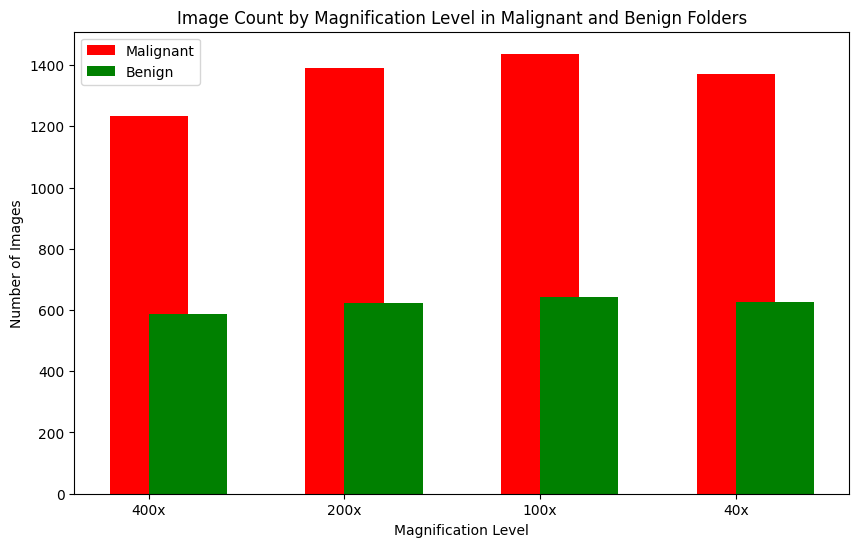

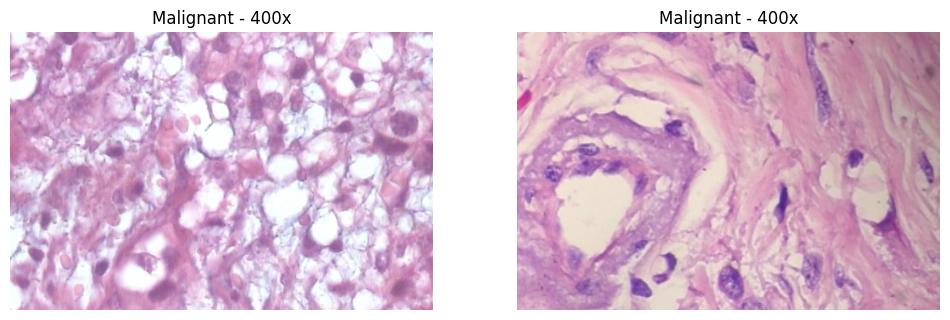

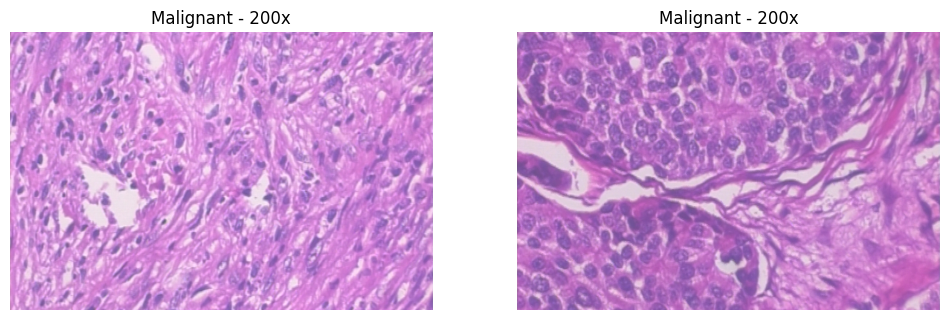

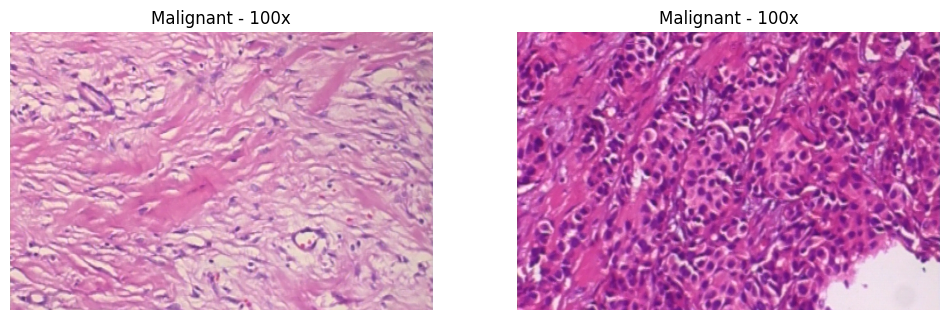

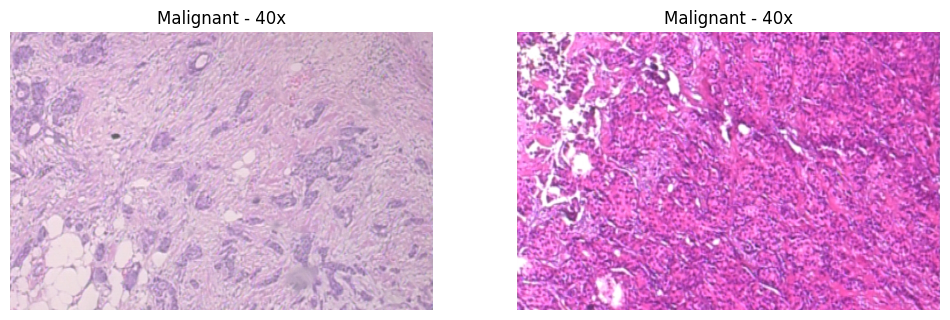

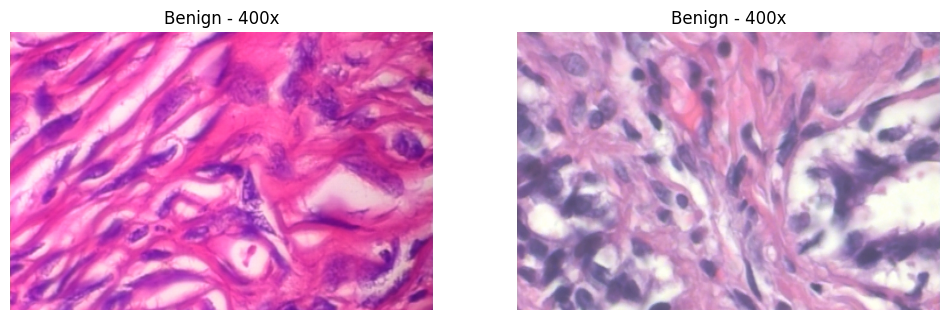

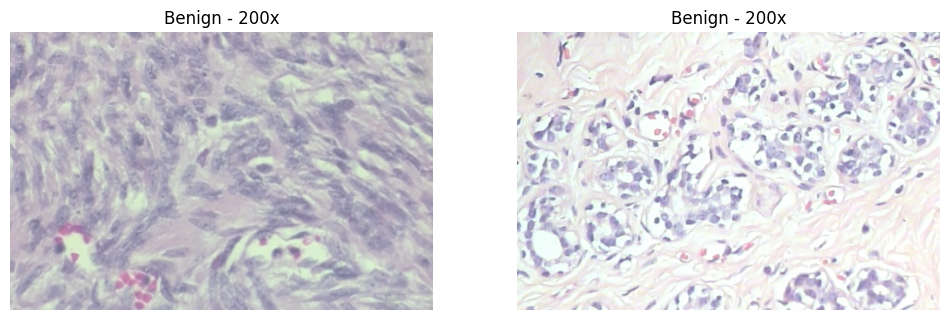

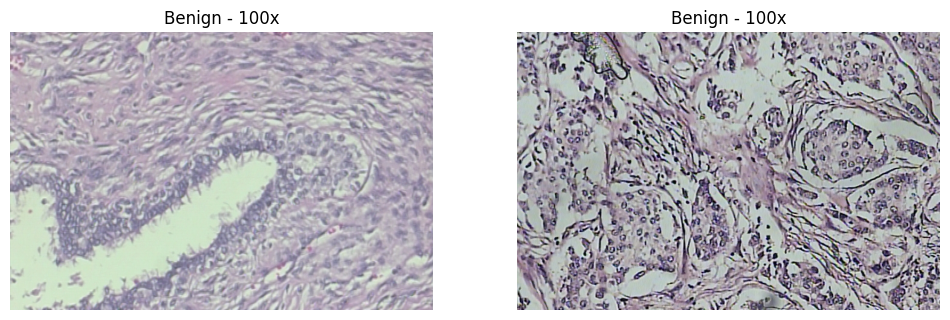

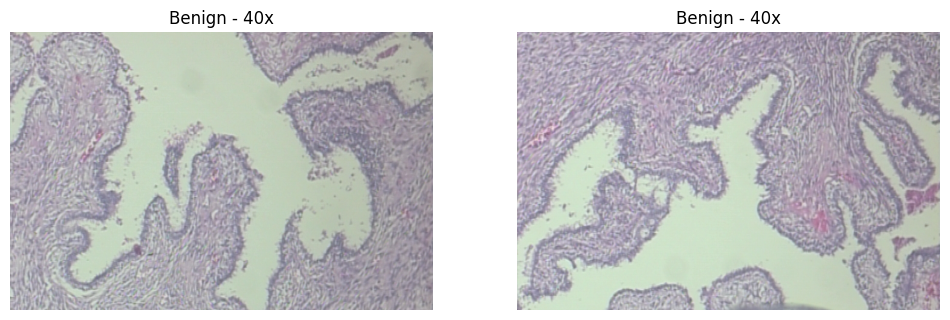

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Paths to dataset
malignant_path = '/content/breakhis_classification_data/malignant'
benign_path = '/content/breakhis_classification_data/benign'

# Function to count images in each subfolder
def count_images_by_magnification(path):
    magnification_counts = {}
    for magnification_folder in os.listdir(path):
        magnification_path = os.path.join(path, magnification_folder)
        if os.path.isdir(magnification_path):
            images = os.listdir(magnification_path)
            magnification_counts[magnification_folder] = len(images)
    return magnification_counts

# Get counts for each magnification level in malignant and benign folders
malignant_counts = count_images_by_magnification(malignant_path)
benign_counts = count_images_by_magnification(benign_path)

# Plotting the counts of images by magnification level
labels = list(malignant_counts.keys())
malignant_vals = list(malignant_counts.values())
benign_vals = list(benign_counts.values())

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, malignant_vals, width=0.4, label='Malignant', color='red', align='center')
plt.bar(x, benign_vals, width=0.4, label='Benign', color='green', align='edge')
plt.xlabel('Magnification Level')
plt.ylabel('Number of Images')
plt.title('Image Count by Magnification Level in Malignant and Benign Folders')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Function to display random images from each magnification level for both classes
def display_random_images_by_magnification(base_path, class_name, num_images=2):
    for magnification_folder in os.listdir(base_path):
        magnification_path = os.path.join(base_path, magnification_folder)
        if os.path.isdir(magnification_path):
            images = os.listdir(magnification_path)
            if len(images) < num_images:
                continue  # Skip if there aren't enough images to display
            selected_images = random.sample(images, num_images)
            plt.figure(figsize=(12, 4))
            for i, img_name in enumerate(selected_images):
                img_path = os.path.join(magnification_path, img_name)
                img = Image.open(img_path)
                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'{class_name} - {magnification_folder}')
            plt.show()

# Display random images from each magnification level in malignant and benign folders
display_random_images_by_magnification(malignant_path, 'Malignant')
display_random_images_by_magnification(benign_path, 'Benign')
